In [2]:
import numpy as np

class SimpleLSTM:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.Wf = np.array([[0.7], [0.5]])
        self.bf = np.array([0.1])
        
        self.Wi = np.array([[0.5], [0.5]])
        self.bi = np.array([0.1])
        
        self.Wc = np.array([[0.2], [0.3]])
        self.bc = np.array([0.4])
        
        self.Wo = np.array([[0.3], [0.9]])
        self.bo = np.array([0.2])
        
        self.Wy = np.array([2.3])
        self.by = np.array([0.5])
        
        self.h = np.zeros((hidden_dim, 1))
        self.c = np.zeros((hidden_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward_step(self, x_t):
        x = np.array([[x_t], [self.h[0, 0]]])
        
        f_t = self.sigmoid(np.dot(self.Wf.T, x) + self.bf)
        i_t = self.sigmoid(np.dot(self.Wi.T, x) + self.bi)
        c_tilde = self.tanh(np.dot(self.Wc.T, x) + self.bc)
        
        self.c = f_t * self.c + i_t * c_tilde
        o_t = self.sigmoid(np.dot(self.Wo.T, x) + self.bo)
        
        self.h = o_t * self.tanh(self.c)
        
        return self.h

    def predict(self):
        return np.dot(self.Wy, self.h) + self.by

    def forward_sequence(self, sequence):
        hidden_states = []
        predictions = []

        for x_t in sequence:
            h_t = self.forward_step(x_t)
            hidden_states.append(h_t.copy())
            predictions.append(self.predict()[0])

        return hidden_states, predictions


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLSTM:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.Wf = np.array([[0.7], [0.5]])
        self.bf = np.array([0.1])
        
        self.Wi = np.array([[0.5], [0.5]])
        self.bi = np.array([0.1])
        
        self.Wc = np.array([[0.2], [0.3]])
        self.bc = np.array([0.4])
        
        self.Wo = np.array([[0.3], [0.9]])
        self.bo = np.array([0.2])
        
        self.Wy = np.array([2.3])
        self.by = np.array([0.5])
        
        self.h = np.zeros((hidden_dim, 1))
        self.c = np.zeros((hidden_dim, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward_step(self, x_t):
        x = np.array([[x_t], [self.h[0, 0]]])
        
        f_t = self.sigmoid(np.dot(self.Wf.T, x) + self.bf)
        i_t = self.sigmoid(np.dot(self.Wi.T, x) + self.bi)
        c_tilde = self.tanh(np.dot(self.Wc.T, x) + self.bc)
        
        self.c = f_t * self.c + i_t * c_tilde
        o_t = self.sigmoid(np.dot(self.Wo.T, x) + self.bo)
        
        self.h = o_t * self.tanh(self.c)
        
        return self.h

    def predict(self):
        y_pred = np.dot(self.Wy, self.h) + self.by
        return y_pred[0]

    def forward_sequence(self, sequence):
        hidden_states = []
        predictions = []

        for x_t in sequence:
            h_t = self.forward_step(x_t)
            hidden_states.append(h_t.copy())
            predictions.append(self.predict())

        return hidden_states, predictions

# Initialize LSTM with parameters matching the example
input_dim = 1
hidden_dim = 1
lstm = SimpleLSTM(input_dim, hidden_dim)

# Set initial states to match the example
lstm.h = np.array([[0.0]])
lstm.c = np.array([[0.0]])

# Input sequence from the example
sequence = [1, 2, 3]

# Process sequence step by step and print detailed calculations
print("Step-by-Step LSTM Calculations:")
for t, x_t in enumerate(sequence):
    print(f"\nTime Step {t+1}, Input x_{t+1} = {x_t}")

    x = np.array([[x_t], [lstm.h[0, 0]]])
    
    f_t = lstm.sigmoid(np.dot(lstm.Wf.T, x) + lstm.bf)
    print(f"1. Forget gate:")
    print(f"   f_t = sigmoid(W_f^T · [x_t, h_{{t-1}}] + b_f)")
    print(f"   f_t = sigmoid({lstm.Wf.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bf})")
    print(f"   f_t = {f_t[0,0]:.4f}")

    i_t = lstm.sigmoid(np.dot(lstm.Wi.T, x) + lstm.bi)
    print(f"2. Input gate:")
    print(f"   i_t = sigmoid(W_i^T · [x_t, h_{{t-1}}] + b_i)")
    print(f"   i_t = sigmoid({lstm.Wi.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bi})")
    print(f"   i_t = {i_t[0,0]:.4f}")

    c_tilde = lstm.tanh(np.dot(lstm.Wc.T, x) + lstm.bc)
    print(f"3. Candidate cell state:")
    print(f"   c~_t = tanh(W_c^T · [x_t, h_{{t-1}}] + b_c)")
    print(f"   c~_t = tanh({lstm.Wc.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bc})")
    print(f"   c~_t = {c_tilde[0,0]:.4f}")

    c_prev = lstm.c.copy()
    lstm.c = f_t * lstm.c + i_t * c_tilde
    print(f"4. Cell state update:")
    print(f"   c_t = f_t * c_{{t-1}} + i_t * c~_t")
    print(f"   c_t = {f_t[0,0]:.4f} * {c_prev[0,0]:.4f} + {i_t[0,0]:.4f} * {c_tilde[0,0]:.4f}")
    print(f"   c_t = {lstm.c[0,0]:.4f}")

    o_t = lstm.sigmoid(np.dot(lstm.Wo.T, x) + lstm.bo)
    print(f"5. Output gate:")
    print(f"   o_t = sigmoid(W_o^T · [x_t, h_{{t-1}}] + b_o)")
    print(f"   o_t = sigmoid({lstm.Wo.T} · {[[x_t], [lstm.h[0, 0]]]} + {lstm.bo})")
    print(f"   o_t = {o_t[0,0]:.4f}")

    h_prev = lstm.h.copy()
    lstm.h = o_t * lstm.tanh(lstm.c)
    print(f"6. Hidden state update:")
    print(f"   h_t = o_t * tanh(c_t)")
    print(f"   h_t = {o_t[0,0]:.4f} * tanh({lstm.c[0,0]:.4f})")
    print(f"   h_t = {lstm.h[0,0]:.4f}")


Step-by-Step LSTM Calculations:

Time Step 1, Input x_1 = 1
1. Forget gate:
   f_t = sigmoid(W_f^T · [x_t, h_{t-1}] + b_f)
   f_t = sigmoid([[0.7 0.5]] · [[1], [0.0]] + [0.1])
   f_t = 0.6900
2. Input gate:
   i_t = sigmoid(W_i^T · [x_t, h_{t-1}] + b_i)
   i_t = sigmoid([[0.5 0.5]] · [[1], [0.0]] + [0.1])
   i_t = 0.6457
3. Candidate cell state:
   c~_t = tanh(W_c^T · [x_t, h_{t-1}] + b_c)
   c~_t = tanh([[0.2 0.3]] · [[1], [0.0]] + [0.4])
   c~_t = 0.5370
4. Cell state update:
   c_t = f_t * c_{t-1} + i_t * c~_t
   c_t = 0.6900 * 0.0000 + 0.6457 * 0.5370
   c_t = 0.3467
5. Output gate:
   o_t = sigmoid(W_o^T · [x_t, h_{t-1}] + b_o)
   o_t = sigmoid([[0.3 0.9]] · [[1], [0.0]] + [0.2])
   o_t = 0.6225
6. Hidden state update:
   h_t = o_t * tanh(c_t)
   h_t = 0.6225 * tanh(0.3467)
   h_t = 0.2076

Time Step 2, Input x_2 = 2
1. Forget gate:
   f_t = sigmoid(W_f^T · [x_t, h_{t-1}] + b_f)
   f_t = sigmoid([[0.7 0.5]] · [[2], [0.20758373501228553]] + [0.1])
   f_t = 0.8325
2. Input gate:
   

In [4]:
# Predict next value
next_value = lstm.predict()
print("\nFinal Prediction:")
print(f"ŷ_5 = W_y · h_4 + b_y")
print(f"ŷ_5 = {lstm.Wy[0]} · {lstm.h[0,0]:.4f} + {lstm.by[0]}")
print(f"ŷ_5 = {next_value:.4f}")




Final Prediction:
ŷ_5 = W_y · h_4 + b_y
ŷ_5 = 2.3 · 0.7406 + 0.5
ŷ_5 = 2.2034


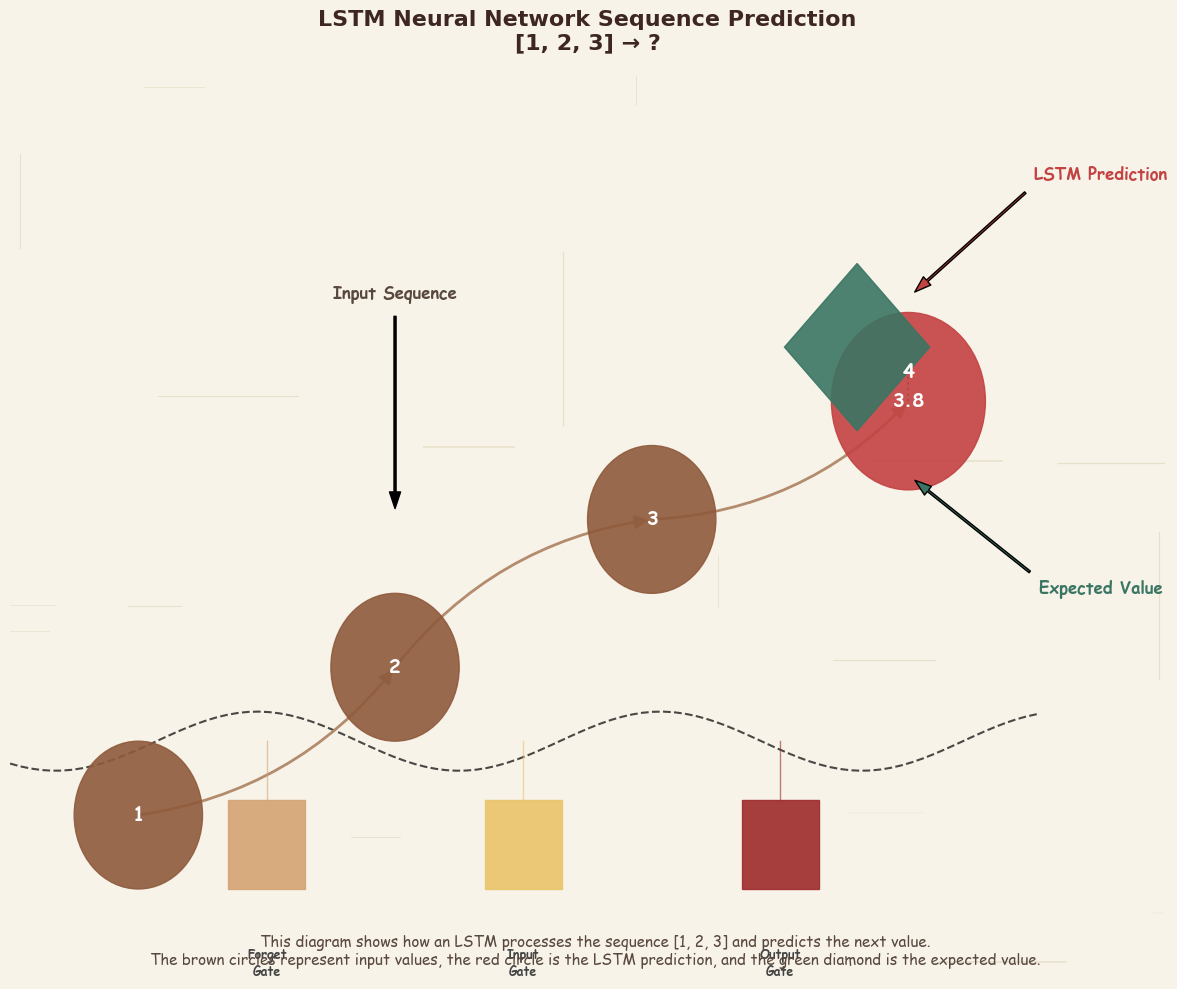

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.collections import PatchCollection

# Create the figure with a specific aspect ratio
fig, ax = plt.subplots(figsize=(12, 10), facecolor='#f7f3e9')  # Vintage paper background

# Actual data
sequence = [1, 2, 3]
next_value = 3.8  # Using your predicted value
expected_value = 4

# Create a hand-drawn look
plt.rcParams['font.family'] = 'Comic Sans MS'
plt.rcParams['path.effects'] = []

# Create a vintage circuit board background
for i in range(20):
    for j in range(20):
        if np.random.random() > 0.92:
            # Draw random circuit lines
            start_x = np.random.uniform(0, 12)
            start_y = np.random.uniform(0, 10)
            length = np.random.uniform(0.2, 1.2)
            angle = np.random.choice([0, np.pi/2, np.pi, 3*np.pi/2])
            end_x = start_x + length * np.cos(angle)
            end_y = start_y + length * np.sin(angle)
            plt.plot([start_x, end_x], [start_y, end_y], color='#d0c8a0', 
                     linewidth=np.random.uniform(0.3, 1.2), alpha=0.4)

# Draw a "neural network" path
nn_x = np.linspace(2, 10, 100)
nn_y = 1.5 + 0.2 * np.sin(nn_x * 2) 
plt.plot(nn_x, nn_y, 'k--', linewidth=1.5, alpha=0.7, zorder=1)

# Create custom nodes for our sequence
nodes = []
node_colors = []
node_sizes = []
node_x = [3, 5, 7, 9]  # X positions for nodes
node_y = [1, 2, 3, next_value]  # Y positions (our sequence + prediction)

# Draw arrows connecting nodes (neural pathways)
for i in range(len(node_x)-1):
    # Create curved arrows between points
    arrow_curve = patches.FancyArrowPatch(
        (node_x[i], node_y[i]), 
        (node_x[i+1], node_y[i+1]),
        connectionstyle=f"arc3,rad={0.2 if i % 2 == 0 else -0.2}",
        arrowstyle="-|>", 
        mutation_scale=20,
        lw=2, 
        color='#b38b6d',
        zorder=2
    )
    ax.add_patch(arrow_curve)

# Create nodes (neural units)
for i in range(len(node_x)):
    if i < len(node_x) - 1:
        # Input nodes (our sequence)
        node = plt.Circle((node_x[i], node_y[i]), 0.5, 
                          color='#8f5a3c', alpha=0.9, zorder=3)
        ax.add_patch(node)
        # Add text label
        plt.text(node_x[i], node_y[i], str(node_y[i]), 
                 ha='center', va='center', color='white', 
                 fontsize=14, fontweight='bold', zorder=4)
    else:
        # Prediction node (special styling)
        node = plt.Circle((node_x[i], node_y[i]), 0.6, 
                          color='#c34242', alpha=0.9, zorder=3)
        ax.add_patch(node)
        # Add prediction text
        plt.text(node_x[i], node_y[i], f"{node_y[i]:.1f}", 
                 ha='center', va='center', color='white', 
                 fontsize=14, fontweight='bold', zorder=4)

# Add the expected value as a different shape
expected_node = plt.Rectangle((node_x[-1]-0.4, expected_value-0.4), 0.8, 0.8, 
                              angle=45, color='#3a7563', alpha=0.9, zorder=3)
ax.add_patch(expected_node)
plt.text(node_x[-1], expected_value, str(expected_value), 
         ha='center', va='center', color='white', 
         fontsize=14, fontweight='bold', zorder=4)

# Draw a dashed line connecting prediction and expected
plt.plot([node_x[-1], node_x[-1]], [node_y[-1], expected_value], 
         'k:', linewidth=1.5, alpha=0.7, zorder=2)

# Add annotations for clarity
plt.annotate('Input Sequence', xy=(node_x[1], node_y[1]+1), 
             xytext=(node_x[1], node_y[1]+2.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=12, fontweight='bold', color='#59483e')

plt.annotate('LSTM Prediction', xy=(node_x[-1], node_y[-1]+0.7), 
             xytext=(node_x[-1]+1.5, node_y[-1]+1.5),
             arrowprops=dict(facecolor='#c34242', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=12, fontweight='bold', color='#c34242')

plt.annotate('Expected Value', xy=(node_x[-1], expected_value-0.7), 
             xytext=(node_x[-1]+1.5, expected_value-1.5),
             arrowprops=dict(facecolor='#3a7563', shrink=0.05, width=1.5, headwidth=8),
             ha='center', fontsize=12, fontweight='bold', color='#3a7563')

# Add decorative LSTM gates as small icons near the path
gate_positions = [(4, 0.8), (6, 0.8), (8, 0.8)]
gate_labels = ['Forget\nGate', 'Input\nGate', 'Output\nGate']
gate_colors = ['#d4a373', '#e9c46a', '#9e2a2b']

for i, (pos, label, color) in enumerate(zip(gate_positions, gate_labels, gate_colors)):
    gate = plt.Rectangle((pos[0]-0.3, pos[1]-0.3), 0.6, 0.6, 
                          color=color, alpha=0.9, zorder=3)
    ax.add_patch(gate)
    plt.text(pos[0], pos[1]-0.8, label, ha='center', va='center', 
             fontsize=9, color='#444444', fontweight='bold')
    
    # Connect gate to pathway with a thin line
    plt.plot([pos[0], pos[0]], [pos[1]+0.3, 1.5], 
             color=color, linestyle='-', linewidth=1, alpha=0.6)

# Add a title that explains the visualization
plt.title('LSTM Neural Network Sequence Prediction\n[1, 2, 3] → ?', 
          fontsize=16, fontweight='bold', color='#3e2723', pad=20)

# Add explanatory text
plt.figtext(0.5, 0.03, 
            "This diagram shows how an LSTM processes the sequence [1, 2, 3] and predicts the next value.\n" + 
            "The brown circles represent input values, the red circle is the LSTM prediction, and the green diamond is the expected value.",
            ha='center', fontsize=11, color='#59483e')

# No need for conventional axes here
plt.axis('off')

# Set layout and limits for the diagram
plt.xlim(2, 11)
plt.ylim(0, 6)

plt.tight_layout()
plt.show()